# FINAL PROJECT THICKET

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [2]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/mpi/reversed/*.cali"))

# CUDA Thicket Variables

In [3]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/cuda/random/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/cuda/perturbed/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/cuda/sorted/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("bitonic_ProjectOuts/cuda/reversed/*.cali"))

In [4]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [5]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_perturbed"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [6]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
        
tks["mpi_random"].metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source,correctness,values_per_proc
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
49820538,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p128/bitonic_mpi_p128-a4194304_...,true,1700991197,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 4194304, 0]",c,bitonic_sort,MPI,float,4,4194304,random_array,128,1,Online,1,32768
151973436,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p128/bitonic_mpi_p128-a67108864...,true,1700991246,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 67108864, 0]",c,bitonic_sort,MPI,float,4,67108864,random_array,128,1,Online,1,524288
169072093,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p4/bitonic_mpi_p4-a16777216_0.cali,true,1700991208,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 16777216, 0]",c,bitonic_sort,MPI,float,4,16777216,random_array,4,1,Online,1,4194304
211161223,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p8/bitonic_mpi_p8-a4194304_0.cali,true,1700991208,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 4194304, 0]",c,bitonic_sort,MPI,float,4,4194304,random_array,8,1,Online,1,524288
230781526,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p8/bitonic_mpi_p8-a65536_0.cali,true,1700991161,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 65536, 0]",c,bitonic_sort,MPI,float,4,65536,random_array,8,1,Online,1,8192
264856712,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p16/bitonic_mpi_p16-a262144_0.cali,true,1700991161,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 262144, 0]",c,bitonic_sort,MPI,float,4,262144,random_array,16,1,Online,1,16384
314086722,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p32/bitonic_mpi_p32-a67108864_0...,true,1700991227,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 67108864, 0]",c,bitonic_sort,MPI,float,4,67108864,random_array,32,1,Online,1,2097152
330190771,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p256/bitonic_mpi_p256-a4194304_...,true,1700991197,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 4194304, 0]",c,bitonic_sort,MPI,float,4,4194304,random_array,256,1,Online,1,16384
338555806,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outputs/random/p2/bitonic_mpi_p2-a262144_0.cali,true,1700991161,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_mpi, 262144, 0]",c,bitonic_sort,MPI,float,4,262144,random_array,2,1,Online,1,131072


In [7]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [8]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("num_blocks")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b881e5a32b0>, 262144: <thicket.thicket.Thicket object at 0x2b881e50e490>, 1048576: <thicket.thicket.Thicket object at 0x2b881e3a8eb0>, 4194304: <thicket.thicket.Thicket object at 0x2b881e7af2b0>, 16777216: <thicket.thicket.Thicket object at 0x2b881e0329a0>, 67108864: <thicket.thicket.Thicket object at 0x2b881e7ce940>, 268435456: <thicket.thicket.Thicket object at 0x2b881e51a130>}
22  thickets created...
{64: <thicket.thicket.Thicket object at 0x2b881df0ce50>, 128: <thicket.thicket.Thicket object at 0x2b881e69c520>, 256: <thicket.thicket.Thicket object at 0x2b881dfdcc40>, 512: <thicket.thicket.Thicket object at 0x2b881e45ab20>, 1024: <thicket.thicket.Thicket object at 0x2b881e48dca0>, 2048: <thicket.thicket.Thicket object at 0x2b881e1de4c0>, 4096: <thicket.thicket.Thicket object at 0x2b881e5051f0>, 8192: <thicket.thicket.Thicket object at 0x2b881e6b3760>, 16384: <thicket.thicket.Thicket object at 0x2b881e36feb0>, 32768

17  thickets created...
{64: <thicket.thicket.Thicket object at 0x2b881eee6550>, 128: <thicket.thicket.Thicket object at 0x2b881eeecd60>, 256: <thicket.thicket.Thicket object at 0x2b881eef2070>, 512: <thicket.thicket.Thicket object at 0x2b881eef82e0>, 1024: <thicket.thicket.Thicket object at 0x2b881eef8a00>, 2048: <thicket.thicket.Thicket object at 0x2b881ef05340>, 4096: <thicket.thicket.Thicket object at 0x2b881ef0b430>, 8192: <thicket.thicket.Thicket object at 0x2b881ef0e220>, 16384: <thicket.thicket.Thicket object at 0x2b881ef0ebe0>, 32768: <thicket.thicket.Thicket object at 0x2b881ef1a1f0>, 65536: <thicket.thicket.Thicket object at 0x2b881ef201c0>, 131072: <thicket.thicket.Thicket object at 0x2b881ef23d00>, 262144: <thicket.thicket.Thicket object at 0x2b881ef2c160>, 524288: <thicket.thicket.Thicket object at 0x2b881ef30160>, 1048576: <thicket.thicket.Thicket object at 0x2b881ef36ca0>, 2097152: <thicket.thicket.Thicket object at 0x2b881ef3b0a0>, 4194304: <thicket.thicket.Thicket obj

Compose these 3 groups column-wise to get a holistic view of the data

In [9]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [10]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )

In [11]:
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

In [12]:
valsPerBlockList = ctks["cuda_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
for i in ctks.keys():
    if "cuda" in i:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

        else:
            for valPerBlock in valsPerBlockList: #[32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerBlock, "nid"), (valPerBlock, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            
        else: 
            for valPerProc in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerProc, "nid"), (valPerProc, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            

In [14]:
ctks["cuda_sorted_weak"].dataframe

64                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.349382      0.349382      0.349382   
comm              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000148      0.000148      0.000148   
comm_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000138      0.000138      0.000138   
cudaMemcpy        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000125      0.000125      0.000125   
comp              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000875      0.000875      0.000875   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000833      0.000833      0.000833   
correctness_check 64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000205      0.000205      0.000205   
data_init         64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024             0.000230      0.000230      0.000230   

                                                                              \
                              Total time Avg GPU Time/rank Min GPU Time/rank   
name              num_threads                                                  
main              64                 NaN               NaN               NaN   
                  128                NaN               NaN               NaN   
                  256                NaN               NaN               NaN   
                  512                NaN               NaN               NaN   
                  1024          0.349382          0.000678          0.000678   
comm              64                 NaN               NaN               NaN   
                  128                NaN               NaN               NaN   
               

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [15]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Examples

In [16]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank
num_procs,,,,,
2,1.111339,1.112648,1.111993,2.223987,0.000000
4,1.096543,1.098074,1.096960,4.387840,0.000000
8,0.519505,0.521496,0.520015,4.160123,0.000000
16,1.619714,1.621451,1.619904,25.918462,0.000000
32,1.650049,1.887098,1.767173,56.549534,0.013637
64,3.481303,3.706251,3.555664,227.562511,0.003378
128,4.007663,4.266781,4.078882,522.096837,0.004197
256,4.432907,4.747743,4.557114,1166.621186,0.006108
512,2.700950,4.330915,2.818308,1442.973852,0.150108


In [17]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [18]:
function_names = ("main", "comm", "comp_large")

# MPI STRONG SCALING TIME PLOTS

[1.011947, 1.588622, 1.490958, 1.185445, 0.842014, 0.558274, 0.659045, 0.491637, 0.129076, 0.076293]


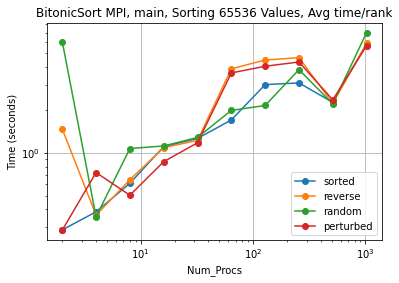

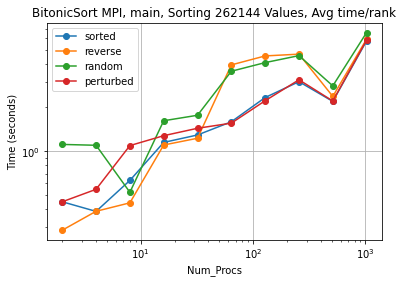

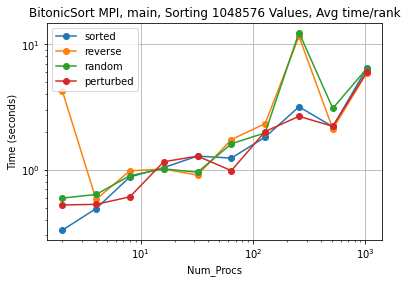

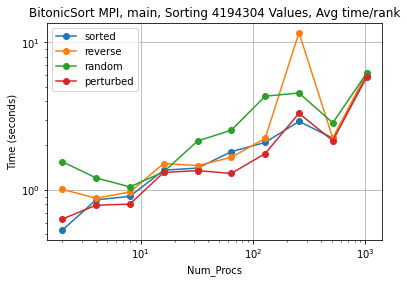

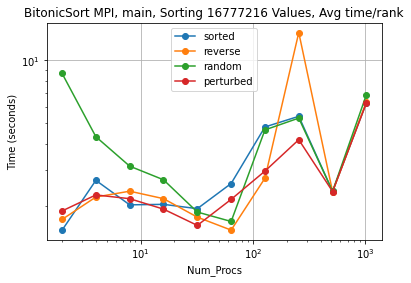

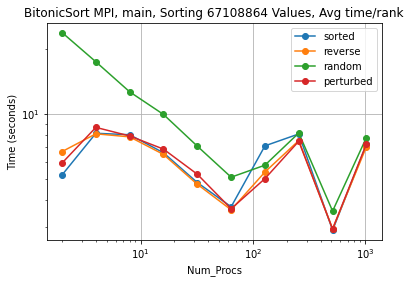

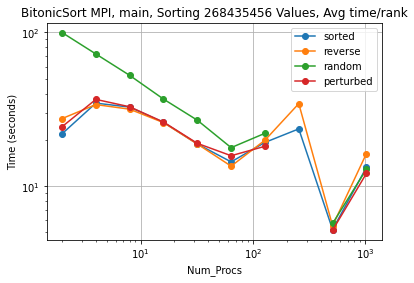

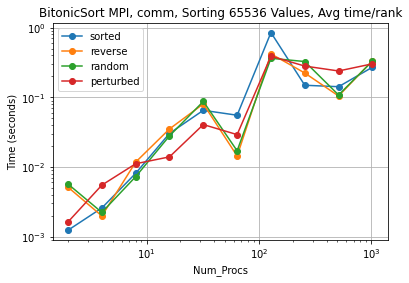

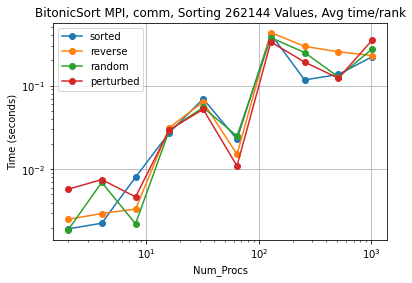

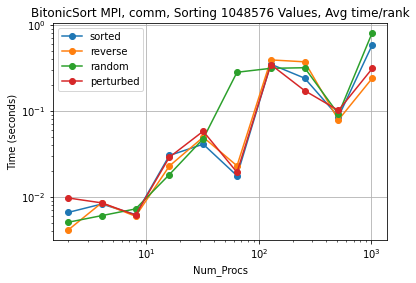

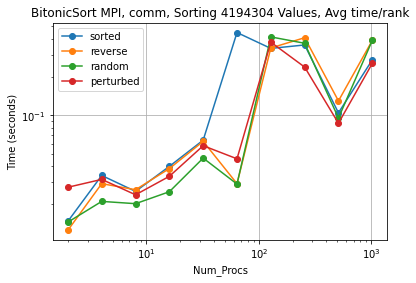

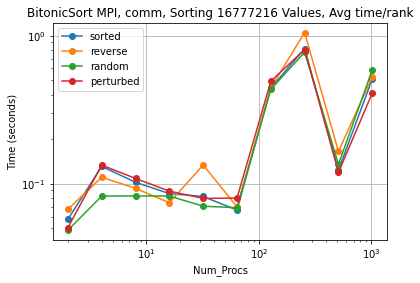

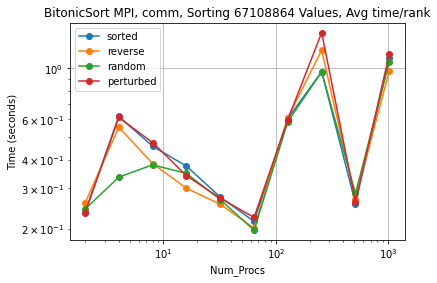

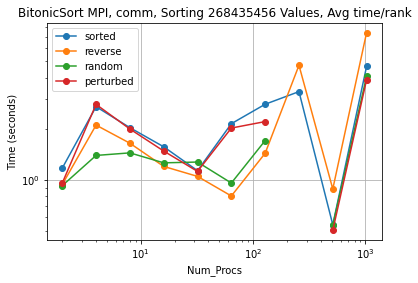

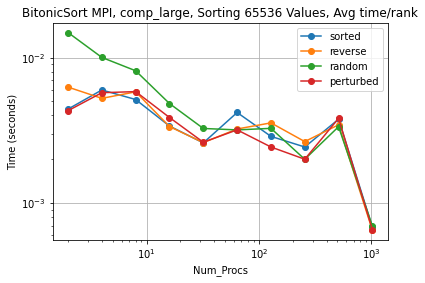

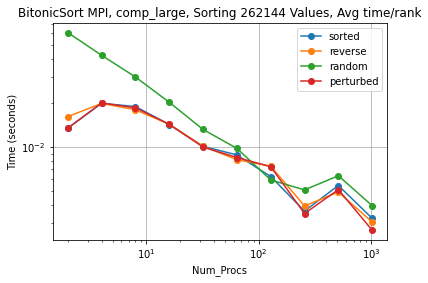

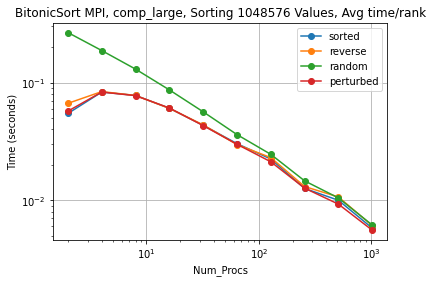

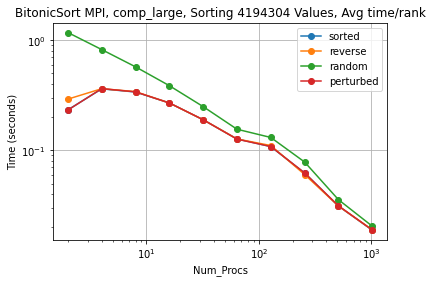

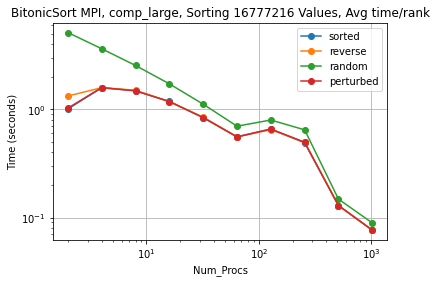

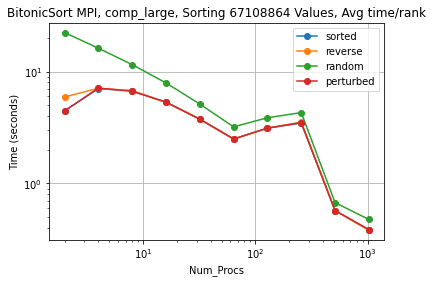

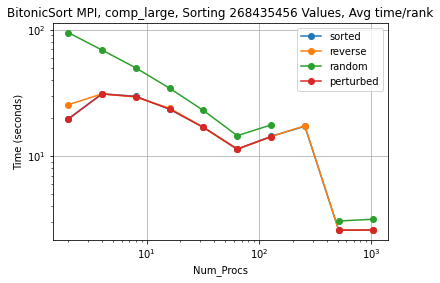

In [37]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1)
        if(inputSize == 16777216 and name == "comp_large"):
            print(list(masterDF["sorted"].values))

        plot_pandas(
            df=masterDF,
            title="BitonicSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

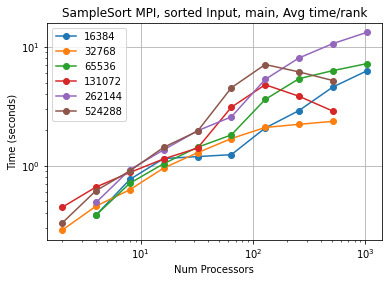

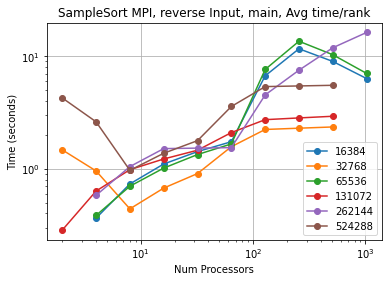

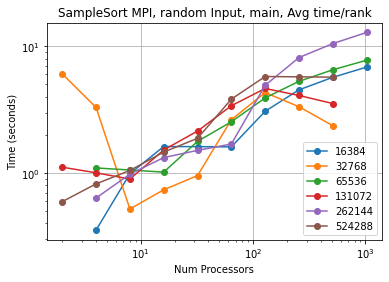

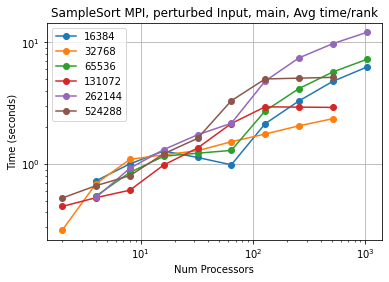

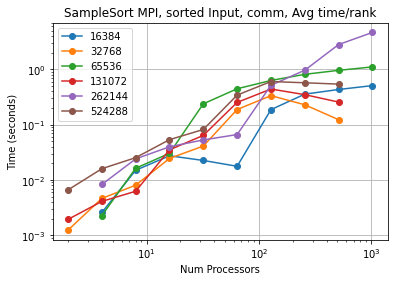

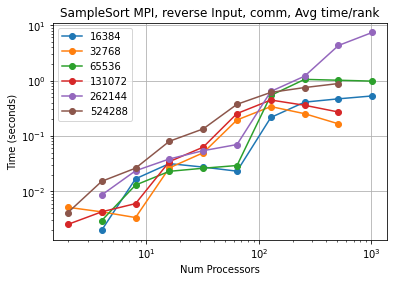

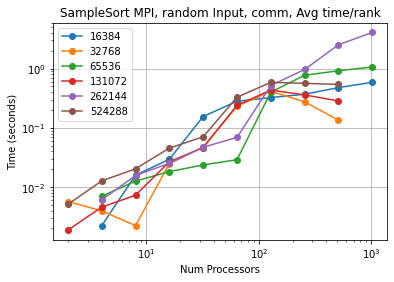

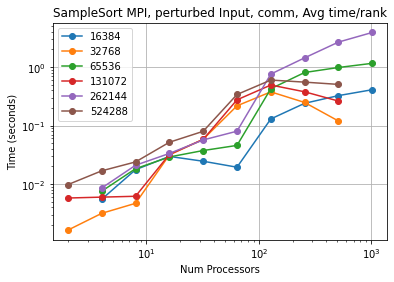

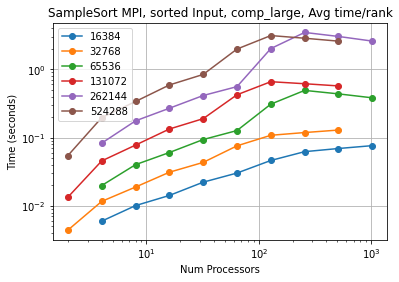

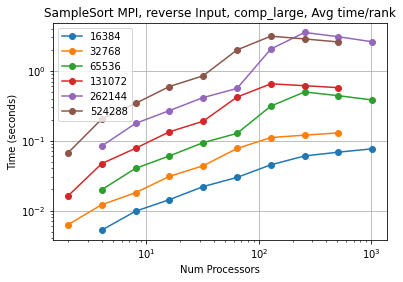

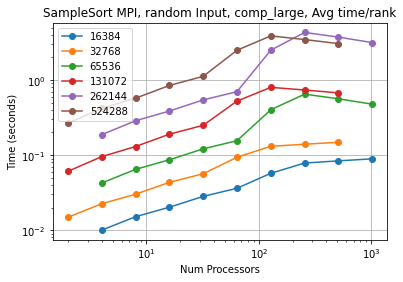

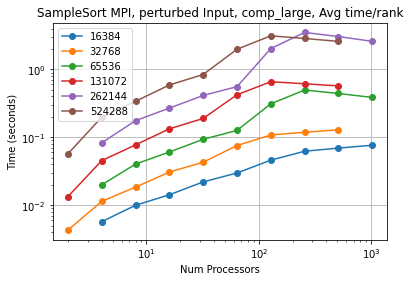

In [20]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                    
                if(count_nan(tempDF.values) > 4):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
        
            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

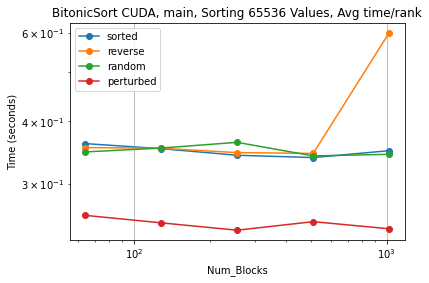

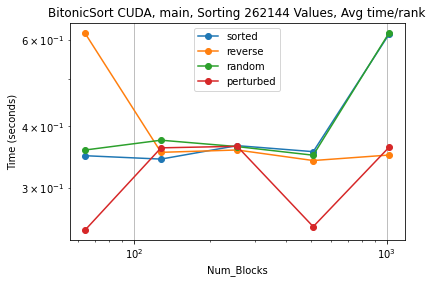

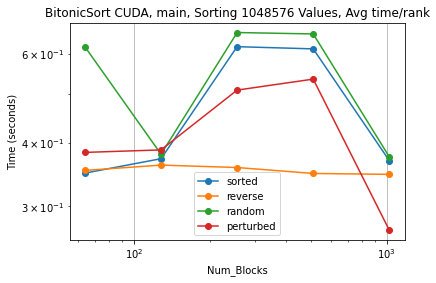

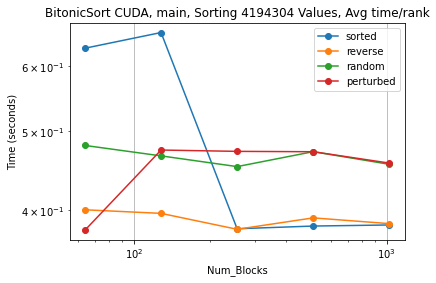

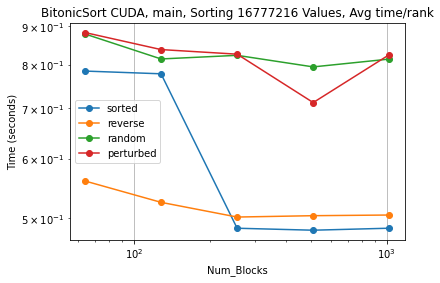

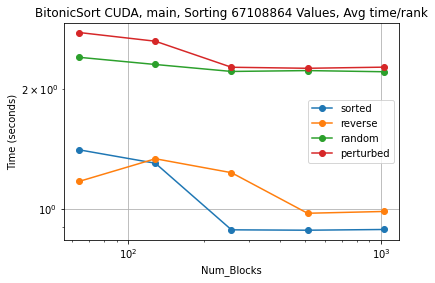

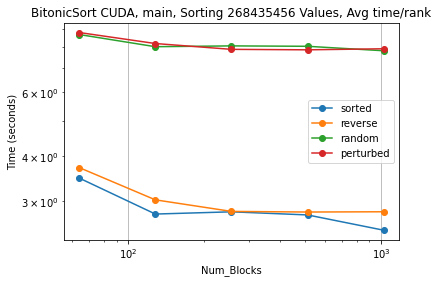

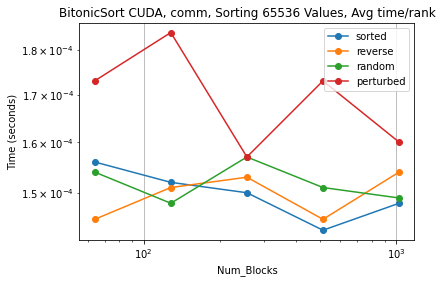

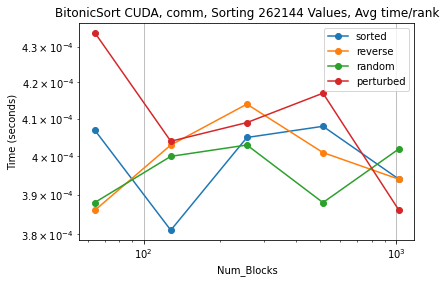

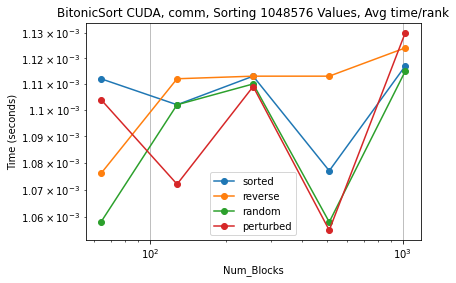

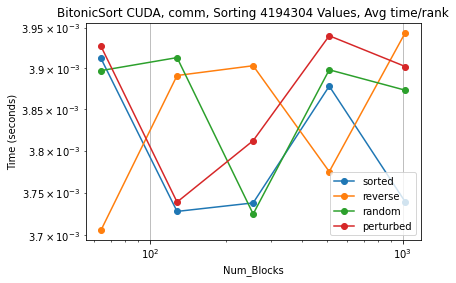

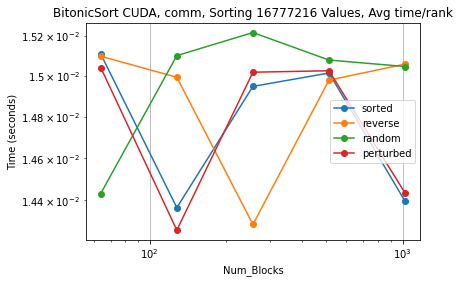

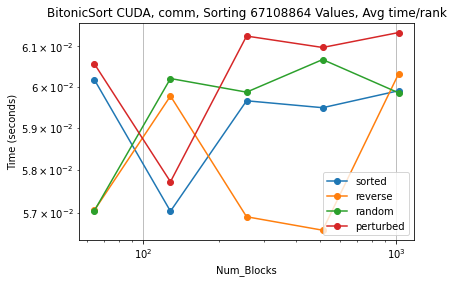

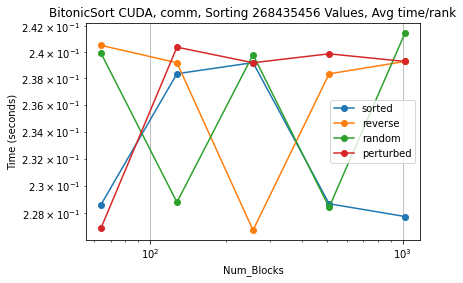

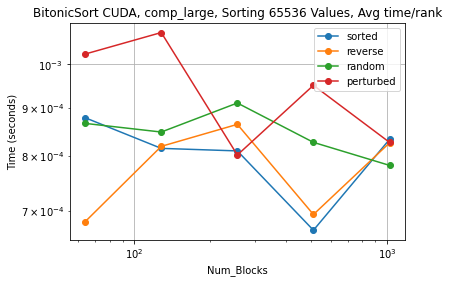

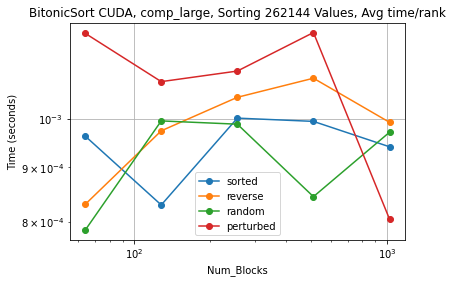

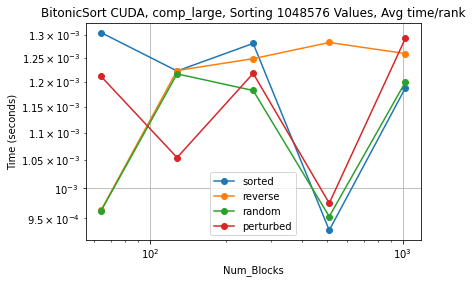

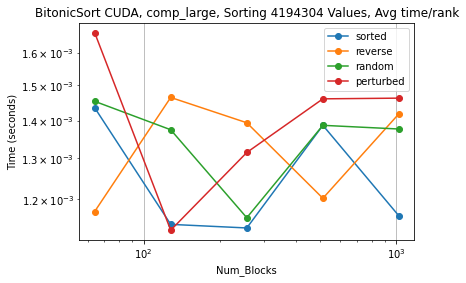

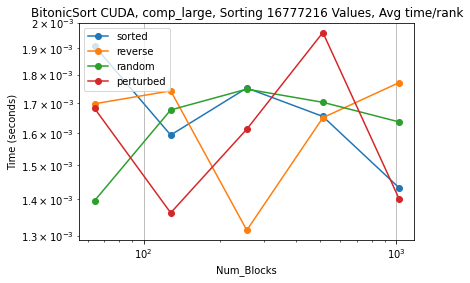

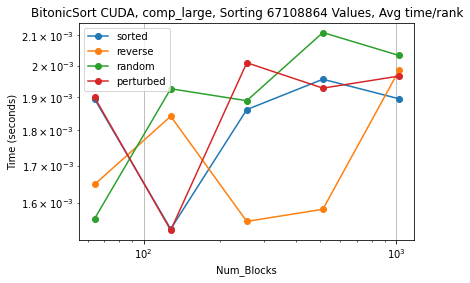

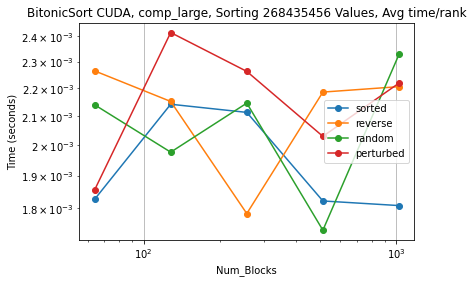

In [21]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="BitonicSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Blocks",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

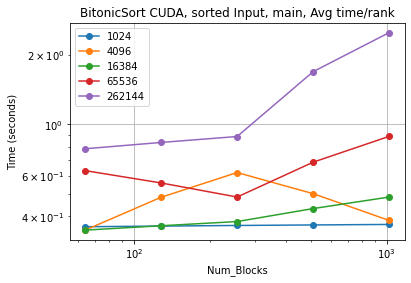

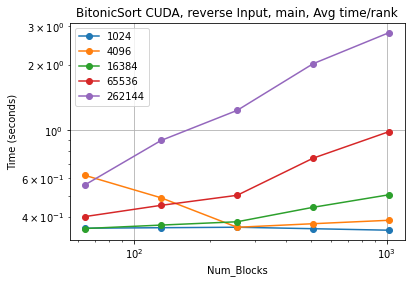

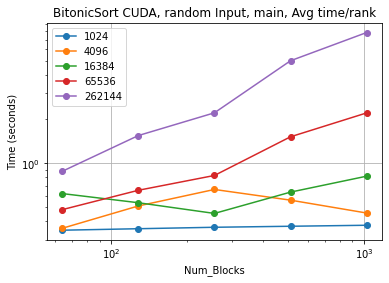

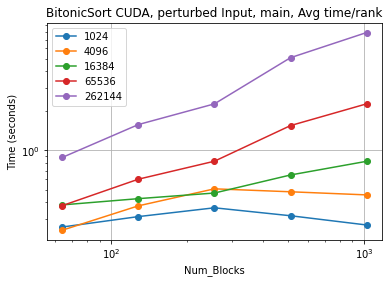

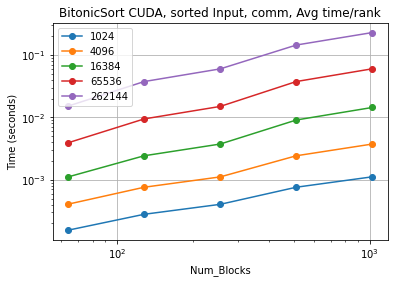

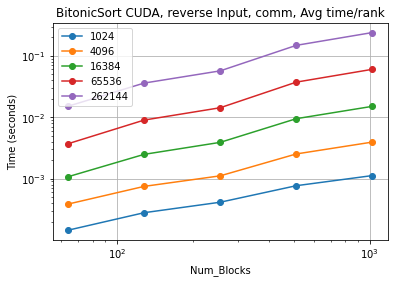

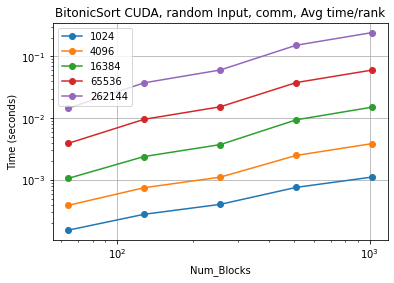

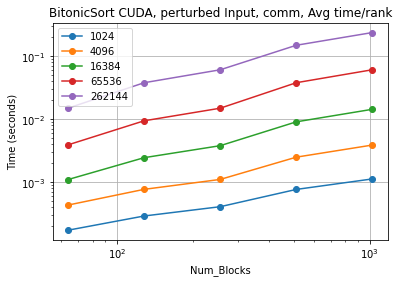

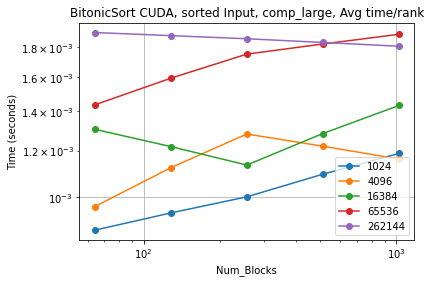

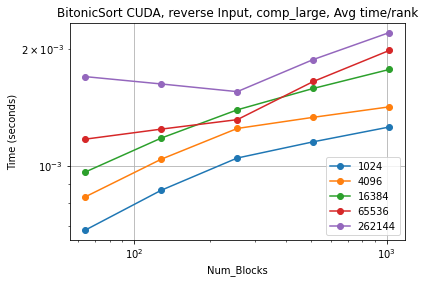

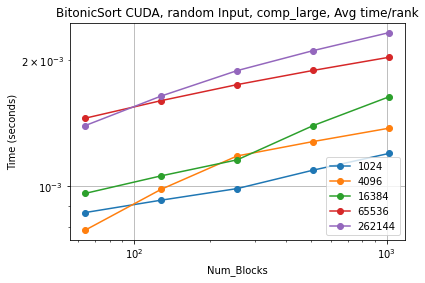

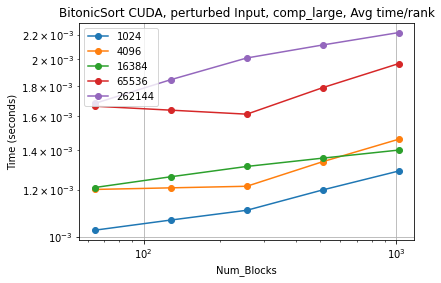

In [30]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerBlockList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864 268435456]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                
                if(count_nan(tempDF.values) > 2):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))

            plot_pandas(
                df=masterDF,
                title="BitonicSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Blocks",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

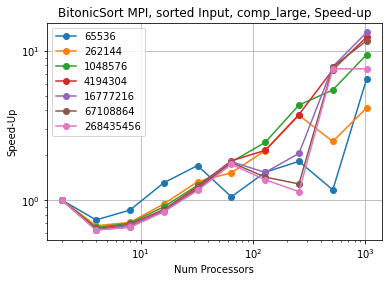

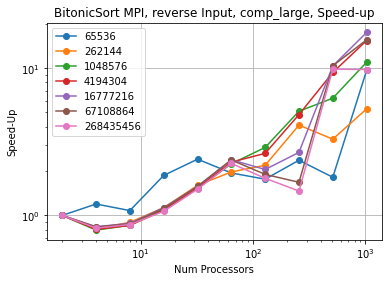

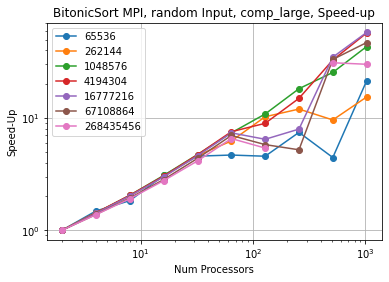

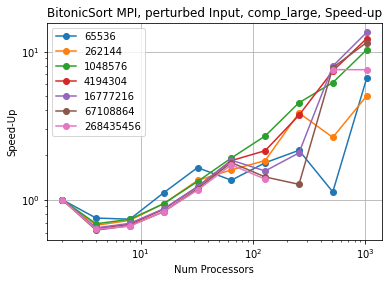

In [38]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="BitonicSort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

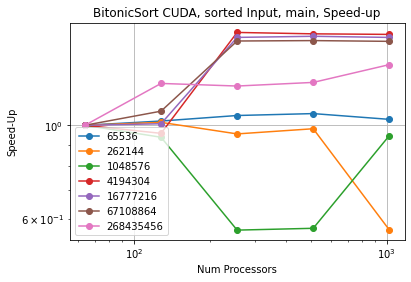

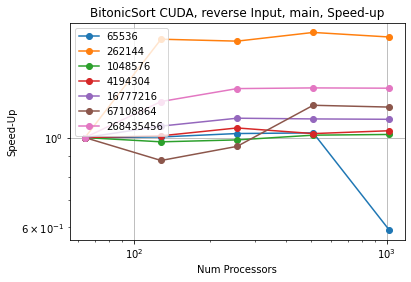

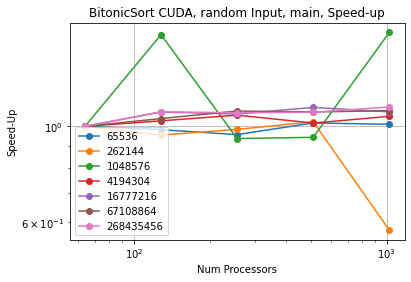

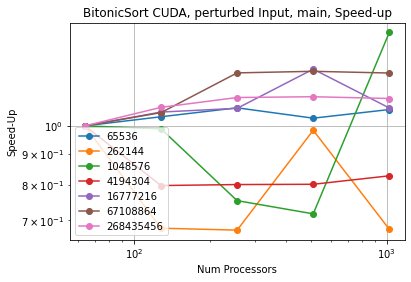

In [39]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="BitonicSort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )